In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

def load_housing_data(housing_path='data'):
    train_csv_path = os.path.join(housing_path, "train.csv")
    test_csv_path = os.path.join(housing_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_housing_data()

In [3]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [48]:
num_att = list(train.select_dtypes([np.number]).columns)

# att = ['OverallQual', 'GrLivArea']

# to_remove = ['BsmtFinSF2', 'MoSold', '3SsnPorch', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold',
#             'PoolArea', 'OverallCond', 'MSSubClass', 'ScreenPorch']

to_remove = ['PoolArea', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'ScreenPorch', '3SsnPorch',
            'BsmtFinSF2', 'MoSold', 'YrSold',
            'GarageArea', 'TotalBsmtSF']

to_remove = ['PoolArea', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'ScreenPorch', '3SsnPorch',
            'BsmtFinSF2', 'MoSold', 'HasBsmt']

for t in to_remove:
    num_att.remove(t)
num_att.remove('Id')
num_att.remove('SalePrice')

# num_att = ['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'YearBuilt']

print(num_att)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YrSold']


In [5]:
train.info()
# train.select_dtypes(include=['object'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
cat_att = ['BldgType', 'CentralAir', 'Foundation', 
           'PavedDrive', 'SaleCondition']
cat_att = ['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 
           'Street', 'LotShape', 'LandContour', 'LotConfig',
           'LandSlope', 'Condition1', 'HouseStyle', 'RoofStyle', 
           'ExterQual', 'ExterCond', 'Foundation', 'PavedDrive', 'SaleCondition']

# TO ADD = Exterior1st, KitchenQual, Functional, SaleType

# cat_att = ['Neighborhood', 'BldgType']
print(cat_att)

['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'PavedDrive', 'SaleCondition']


In [7]:
for a in num_att:
    median = train[a].median()
    train[a].fillna(median, inplace=True)
    
#     median = test[a].median()
    test[a].fillna(median, inplace=True)

In [8]:
train[num_att].info()
test[num_att].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64

In [9]:
train[cat_att].info()
test[cat_att].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
Neighborhood     1460 non-null object
BldgType         1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Condition1       1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
PavedDrive       1460 non-null object
SaleCondition    1460 non-null object
dtypes: object(18)
memory usage: 205.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
Neighborhood     1459 non-null object
BldgType         1459

In [10]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
train['SalePrice'] = np.log(train['SalePrice'])


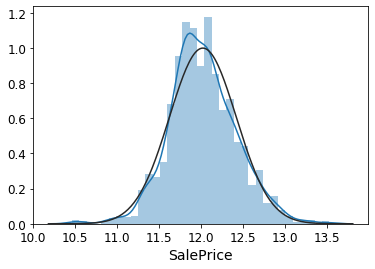

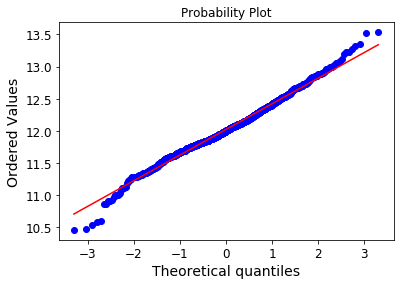

In [11]:

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)



In [12]:
train_y = train["SalePrice"].copy()

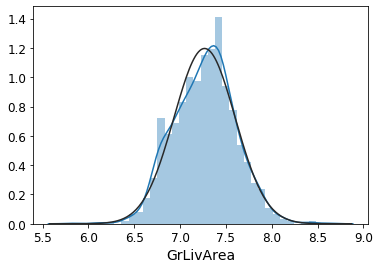

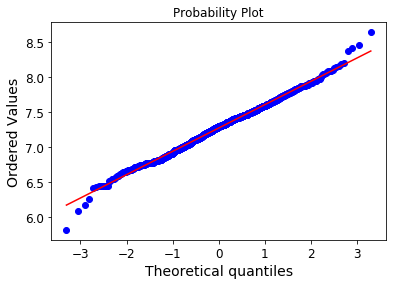

In [13]:
train['GrLivArea'] = np.log(train['GrLivArea'])

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

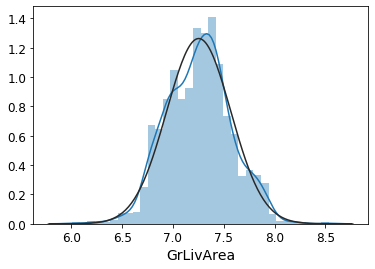

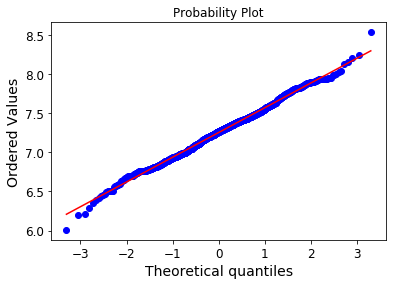

In [14]:
test['GrLivArea'] = np.log(test['GrLivArea'])

sns.distplot(test['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['GrLivArea'], plot=plt)

/home/marek/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


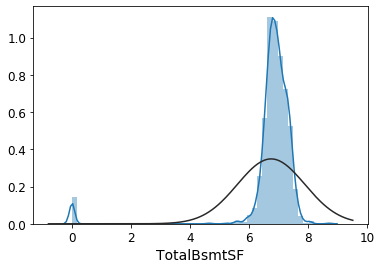

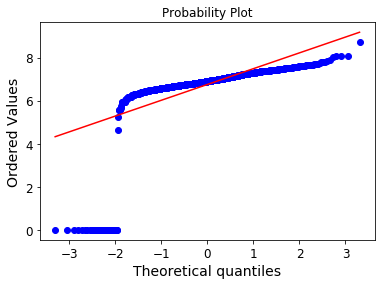

In [15]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

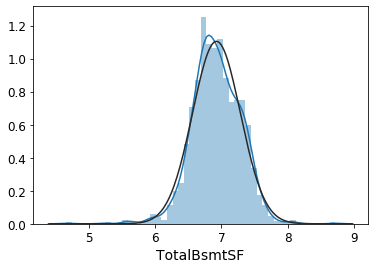

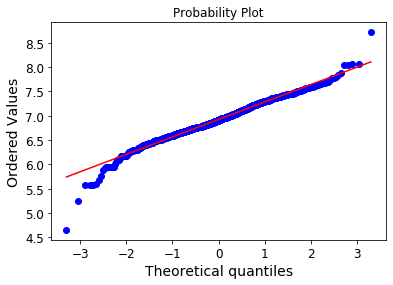

In [16]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

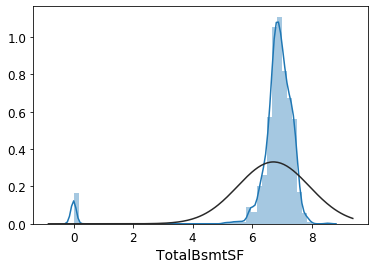

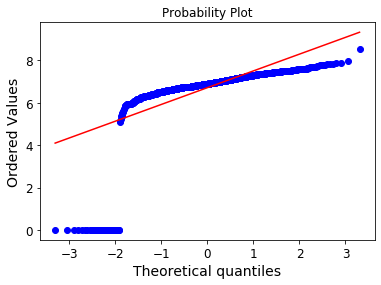

In [17]:
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF']>0,'HasBsmt'] = 1
test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
sns.distplot(test['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['TotalBsmtSF'], plot=plt)

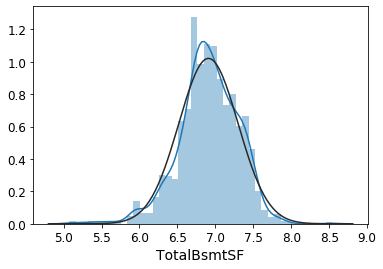

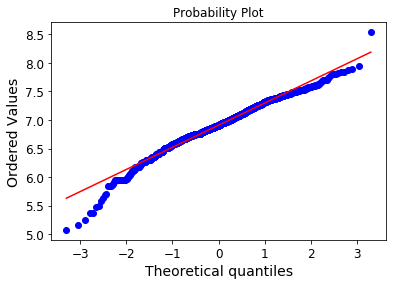

In [18]:
sns.distplot(test[test['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(test[test['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [23]:
num_att.append('HasBsmt')

In [24]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.730255
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.495794
Fireplaces       0.489449
MasVnrArea       0.426775
TotalBsmtSF      0.373009
BsmtFinSF1       0.372023
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
HasBsmt          0.199634
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorc

In [49]:
train2 = train[num_att + cat_att]
train2.info()
test2 = test[num_att + cat_att]
test2.info()

merged_df = pd.concat([train2, test2])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null i

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
train_prepared = num_pipeline.fit_transform(train[num_att])
test_prepared  = num_pipeline.transform(test[num_att])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_att),
        ("cat", OneHotEncoder(), cat_att),
    ])

train_test_full_prepared = full_pipeline.fit_transform(merged_df)
train_full_prepared = full_pipeline.transform(train2)
test_full_prepared = full_pipeline.transform(test2)


In [51]:
print(train_prepared.shape)
print(test_prepared.shape)
print(train_full_prepared.shape)
print(test_full_prepared.shape)

(1460, 28)
(1459, 28)
(1460, 136)
(1459, 136)


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap=False, n_estimators=300, max_features=32, random_state=42)
forest_reg.fit(train_full_prepared, train_y)

housing_predictions = forest_reg.predict(train_full_prepared)

forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0014825298270745948

In [29]:
print(housing_predictions[0])
print(train_y[0])

12.247694320220953
12.247694320220994


In [53]:
train_y_normal = np.e**train_y
pred_normal = np.e**housing_predictions

forest_mse = mean_squared_error(train_y_normal, pred_normal)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

207.04722022536933

In [31]:
print(train_y_normal[0])
print(pred_normal[0])

208500.0
208499.99999999147


In [54]:
# forest_reg.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = []
for a in cat_encoder.categories_:
    for b in a:
        cat_one_hot_attribs.append(b)
# print(cat_one_hot_attribs)
attributes = num_att + cat_one_hot_attribs
sorted(zip(forest_reg.feature_importances_, attributes), reverse=True)

[(0.19372876339870584, 'OverallQual'),
 (0.14339495163410473, 'GrLivArea'),
 (0.08230527622949535, 'YearBuilt'),
 (0.05814297560163124, 'GarageCars'),
 (0.04855508636354472, 'TotalBsmtSF'),
 (0.048274673812116094, 'TA'),
 (0.04401211435432353, '1stFlrSF'),
 (0.04246609033481154, 'GarageArea'),
 (0.040225389478615536, 'FullBath'),
 (0.02857472322769043, 'GarageYrBlt'),
 (0.023361101007249, 'LotArea'),
 (0.02160345547163593, 'BsmtFinSF1'),
 (0.021498026903862495, 'YearRemodAdd'),
 (0.016677397709278993, '2ndFlrSF'),
 (0.015496965548209514, 'Fireplaces'),
 (0.011577584514504262, 'LotFrontage'),
 (0.011009782309791266, 'Y'),
 (0.010974265367527202, 'TotRmsAbvGrd'),
 (0.010492680125785466, 'OverallCond'),
 (0.010232893387731715, 'N'),
 (0.010101863158969746, 'PConc'),
 (0.007680567928830025, 'BsmtUnfSF'),
 (0.006506861181467436, 'OpenPorchSF'),
 (0.005540196659837338, 'Gd'),
 (0.005322403044777506, 'MSSubClass'),
 (0.005059403215619118, 'Ex'),
 (0.00463669446872206, 'MasVnrArea'),
 (0.00446

In [33]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:", scores.std())

forest_reg = RandomForestRegressor(bootstrap=False, n_estimators=200, max_features=32, random_state=42)
forest_reg.fit(train_full_prepared, train_y)

forest_scores = cross_val_score(forest_reg, train_full_prepared, train_y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

print(pd.Series(forest_rmse_scores).describe())

scores: [0.13353517 0.12213838 0.13309413 0.17045595 0.16128232 0.11271246
 0.12980403 0.11612617 0.12419852 0.13850379]
mean: 0.13418509360025663
std: 0.017667330974893126
count    10.000000
mean      0.134185
std       0.018623
min       0.112712
25%       0.122653
50%       0.131449
75%       0.137262
max       0.170456
dtype: float64


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # sprawdza 12 (3×4) kombinacji hiperparametrów
    {'n_estimators': [30, 100, 150, 200, 250, 300], 'max_features': [16, 32, 64, 128]},
    # następnie sprawdza 6 (2×3) kombinacji z wyłączonym parametrem bootstrap (False)
    {'bootstrap': [False], 'n_estimators': [30, 100, 150, 200, 250, 300], 'max_features': [16, 32, 64, 128]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# przeprowadza proces uczenia na pięciu podzbiorach, czyli łącznie (12+6)*5=90 przebiegów 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_full_prepared, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [16, 32, 64, 12

In [35]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 32, 'n_estimators': 300}

In [36]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=32, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.14315558589170044 {'max_features': 16, 'n_estimators': 30}
0.1404637386650913 {'max_features': 16, 'n_estimators': 100}
0.14046336691983607 {'max_features': 16, 'n_estimators': 150}
0.1399994965344934 {'max_features': 16, 'n_estimators': 200}
0.1394949527135255 {'max_features': 16, 'n_estimators': 250}
0.1394851246383167 {'max_features': 16, 'n_estimators': 300}
0.14238653106614535 {'max_features': 32, 'n_estimators': 30}
0.1379658181379852 {'max_features': 32, 'n_estimators': 100}
0.13814626313095635 {'max_features': 32, 'n_estimators': 150}
0.1377819233130102 {'max_features': 32, 'n_estimators': 200}
0.13731456169154418 {'max_features': 32, 'n_estimators': 250}
0.13737194488166674 {'max_features': 32, 'n_estimators': 300}
0.14117776660686626 {'max_features': 64, 'n_estimators': 30}
0.13785566890168624 {'max_features': 64, 'n_estimators': 100}
0.13771098551351532 {'max_features': 64, 'n_estimators': 150}
0.13786199494439022 {'max_features': 64, 'n_estimators': 200}
0.137707924756979

In [38]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.42766895e-03, 1.13341473e-02, 2.16483585e-02, 1.98725069e-01,
       1.06942575e-02, 7.79155794e-02, 2.08498780e-02, 6.46385802e-03,
       2.22374741e-02, 7.61071976e-03, 5.30779652e-02, 4.37774334e-02,
       1.66574084e-02, 1.39669074e-01, 2.89984119e-03, 3.69929316e-02,
       3.84056914e-03, 5.09563575e-03, 1.98173293e-03, 9.36585022e-03,
       1.98209914e-02, 3.17759399e-02, 6.01307139e-02, 4.13104391e-02,
       3.94457623e-03, 6.73519852e-03, 2.20637515e-03, 2.41332174e-03,
       6.73666714e-04, 4.13196832e-05, 1.03301278e-05, 1.14975377e-04,
       3.47122222e-04, 5.61140001e-04, 3.51075183e-04, 1.58346143e-03,
       1.45842477e-03, 1.91510121e-04, 8.65085700e-04, 3.42045255e-04,
       2.14056487e-04, 5.85023328e-04, 2.26079015e-05, 2.12935112e-04,
       2.20289430e-04, 4.33043766e-04, 1.48482469e-03, 1.66951087e-04,
       4.02878481e-04, 1.69330767e-04, 3.39119086e-04, 2.23096271e-04,
       1.08510634e-04, 6.87984278e-05, 1.51473250e-03, 1.64391707e-04,
      

In [39]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = []
for a in cat_encoder.categories_:
    for b in a:
        cat_one_hot_attribs.append(b)
# print(cat_one_hot_attribs)
attributes = num_att + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.19872506887935962, 'OverallQual'),
 (0.13966907430715272, 'GrLivArea'),
 (0.07791557941710565, 'YearBuilt'),
 (0.060130713910662416, 'GarageCars'),
 (0.053077965243824736, 'TotalBsmtSF'),
 (0.051912493805790265, 'TA'),
 (0.0437774334100691, '1stFlrSF'),
 (0.041310439087577665, 'GarageArea'),
 (0.036992931586678754, 'FullBath'),
 (0.03177593993452219, 'GarageYrBlt'),
 (0.0222374740786983, 'BsmtFinSF1'),
 (0.021648358518657197, 'LotArea'),
 (0.020849878025949356, 'YearRemodAdd'),
 (0.019820991362676434, 'Fireplaces'),
 (0.016657408403755177, '2ndFlrSF'),
 (0.011334147315345, 'LotFrontage'),
 (0.01091166038700485, 'N'),
 (0.0106942574905539, 'OverallCond'),
 (0.009890521717362464, 'Y'),
 (0.00936585021588403, 'TotRmsAbvGrd'),
 (0.007610719764739152, 'BsmtUnfSF'),
 (0.006735198523044238, 'OpenPorchSF'),
 (0.006463858015189107, 'MasVnrArea'),
 (0.005595269934363371, 'Gd'),
 (0.00542766894981901, 'MSSubClass'),
 (0.00509563574529041, 'BedroomAbvGr'),
 (0.0046937127706420155, 'PConc'),
 (

In [55]:
y_pred = forest_reg.predict(test_full_prepared)
# y_pred = grid_search.predict(test_full_prepared)
y_pred_normal = np.e**y_pred
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_normal})

In [56]:
sub.to_csv("data/submission_script19_norm_TotalBsmtSF_no_HasBsmt.csv", index=False)

In [43]:
sub.shape

(1459, 2)